# Simple Linear Regression Problem:


#### Data contains percentage of marks student is expected to score and the number of hours they studied. We need to predict the score of a student if he studies for 9.25 hours in a day.

## Solution Approach:

### STEP 1:  Importing Libraries and Understanding Data

In [21]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Read the data from excel file
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

In [23]:
# Looking at the first five rows
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
# Looking at the last five rows
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


##### Lets check the data type

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Let's check the summary fo data


In [26]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### STEP 2: Visualising data

Text(0, 0.5, 'Scores')

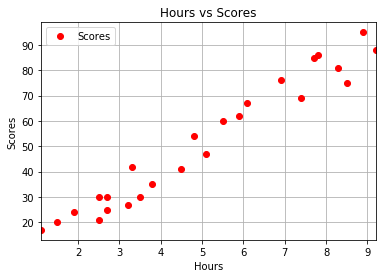

In [30]:
# Plotting the data to see any relationship between the two variables
dataset.plot(x='Hours', y='Scores', style='o', c='r', grid='bool')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

##### We can easily notice a positive relationship between marks obtained and the number of hours put into study

### STEP 3: Splitting the data in Training and Test set

##### Using sklearn we split 70% of our data into training set and rest in test set.

In [44]:
X = dataset.iloc[:,:1].values
y = dataset.iloc[:,1].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)                                               

### Step 4 : Performing Linear Regression


In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
#Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [49]:
# fit the model to the training data
lm.fit(X_train,y_train)
c=lm.intercept_
m=lm.coef_

### Step 5 : Model Evaluation


In [50]:
print(lm.intercept_)

2.639804252151251


In [51]:
print(lm.coef_)

[9.78793983]


##### From the above result we may infern that if hours increses by 1 unit it will affect Scores by 9.78793983 units.

### Step 6 : Predictions


In [72]:
# Making predictions using the model
y_pred = lm.predict(X_test)
y_pred

array([85.83729281, 33.96121171, 29.06724179, 78.98573493, 46.68553349,
       60.38864925, 70.17658908, 17.321714  ])

In [77]:
# predicted value of a student studying for 9.25 hours
hours = [[9.25]]
y_pred =lm.predict(hours)
print('predicted score of the student is:', y_pred)

predicted score of the student is: [93.17824768]


### Step 7: Model Performance Metrics


In [54]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [55]:
from math import sqrt
rmse = sqrt(mse)

In [56]:
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 36.497801150599955
Root_Mean_Squared_Error : 6.041341005985339
r_square_value : 0.9367301586273085


##### If the value of R2 is 0.9367 then this suggests that 93.67% of the variation in Y can be explained with the help of given explanatory variables in that model. In other words, it explains the proportion of variation in the dependent variable that is explained by the independent variables.

### Step 8 : Implementing the results


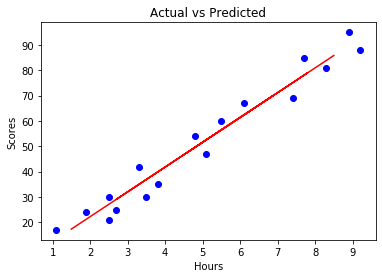

In [75]:
#Actual vs Predicted
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_test,y_pred, color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()